In [17]:
import numpy as np
import utils as ut
from matplotlib import pyplot as plt

## Calculate nGal of Euclid widefield at TIM redshifts. 

Ndz taken from Pozetti 2016 https://arxiv.org/pdf/1603.01453 table 3

Assuming  0.5 × 10−16 erg cm−2 s−1 for deep field (Private correspondence Kevin McCarthy and Dipa)
and 3 × 10−16 erg cm−2 s−1 for wide field (figure 1 caption in Pozetti 2016)

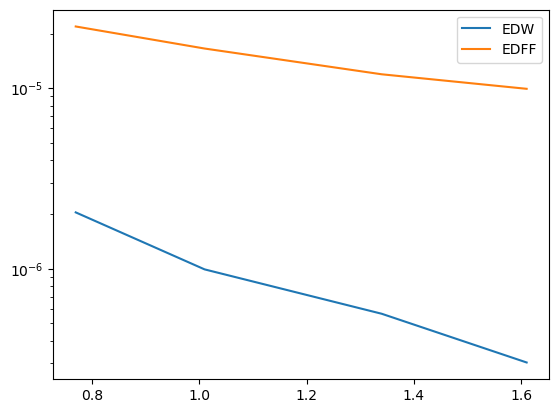

In [23]:
#               Bin1  Bin2  Bin3  Bin4
#                 z ~  .6       .9     1.2  1.45
Ndzs_Wide =  np.array([2273,   1579,  1136, 652])
Ndzs_Deep =  np.array([24255, 26290, 23978, 21272])
zMaxs =      np.array([0.52,   0.77,  1.01, 1.01])
zMins =      np.array([0.77,   1.01,  1.34, 1.61])

NsWide = Ndzs_Wide * (zMaxs - zMins) 
NsDeep = Ndzs_Deep * (zMaxs - zMins) 

dOmega = 0.2 #assumed TIM on-sky area
VBins = ut.volume_cube(zMins, zMaxs, dOmega, lilh = True) #NOTE: VOLUMES ARE IN LITTLE h UNITS!!!

nGalsWide = NsWide/VBins
nGalsDeep = NsDeep/VBins

plt.semilogy(zMins, nGalsWide, label = 'EDW')
plt.semilogy(zMins, nGalsDeep, label = 'EDFF')

plt.legend()

In [24]:
nGalsWide

<Quantity [2.05407984e-06, 9.94197102e-07, 5.64890125e-07, 3.03749169e-07] sr / Mpc3>

In [20]:
nGalsDeep

<Quantity [2.19189206e-05, 1.65531614e-05, 1.19233586e-05, 9.91004958e-06] sr / Mpc3>

In [10]:
from astropy import constants as const, units as u
TwoTeraE = const.h * 80e9 * u.Hz

In [11]:
TwoTeraE.to(u.eV)

<Quantity 0.00033085 eV>